In [105]:
!pip install matplotlib

In [106]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd 
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [107]:
directory="../analysis/v3"
filename_1='driver_strike.csv'
filename_2='normal.csv'
filename_3='progressive_greedy.csv'
filename_4='ride_length.csv'

In [108]:
df=pd.DataFrame()

df_drivers_strike=pd.read_csv(directory+"/"+filename_1,sep=",")
df_normal=pd.read_csv(directory+"/"+filename_2,sep=",")
df_progressive_greedy=pd.read_csv(directory+"/"+filename_3,sep=",")
df_ride_length=pd.read_csv(directory+"/"+filename_4,sep=",")

In [109]:
files = ["normal","driver_strike","progressive_greedy","ride_length"]
idxs = ["unserved_requests", "overhead", "price_fluctuation"]
windows = [100,200,500]

In [110]:
min_max_mean_list = []

for window in windows:
    for idx in idxs:
        for file_name in files:
            row = []
            row.append(idx)
            row.append(file_name)
            row.append(window)
            if file_name == "normal":
                row.append(round(df_normal[f"{idx}_{window}"].min(),2))
                row.append(round(df_normal[f"{idx}_{window}"].max(),2))
                row.append(round(df_normal[f"{idx}_{window}"].mean(),2))
            if file_name == "driver_strike":
                row.append(round(df_drivers_strike[f"{idx}_{window}"].min(),2))
                row.append(round(df_drivers_strike[f"{idx}_{window}"].max(),2))
                row.append(round(df_drivers_strike[f"{idx}_{window}"].mean(),2))
            if file_name == "progressive_greedy":
                row.append(round(df_progressive_greedy[f"{idx}_{window}"].min(),2))
                row.append(round(df_progressive_greedy[f"{idx}_{window}"].max(),2))
                row.append(round(df_progressive_greedy[f"{idx}_{window}"].mean(),2))
            if file_name == "ride_length":
                row.append(round(df_ride_length[f"{idx}_{window}"].min(),2))
                row.append(round(df_ride_length[f"{idx}_{window}"].max(),2))
                row.append(round(df_ride_length[f"{idx}_{window}"].mean(),2))
            min_max_mean_list.append(row)
            
df_min_max_mean = pd.DataFrame(min_max_mean_list,columns=["index","scenario","window","min","max","mean"])
df_min_max_mean.to_csv(directory + "/min_max_mean_indexes.csv",index=False)

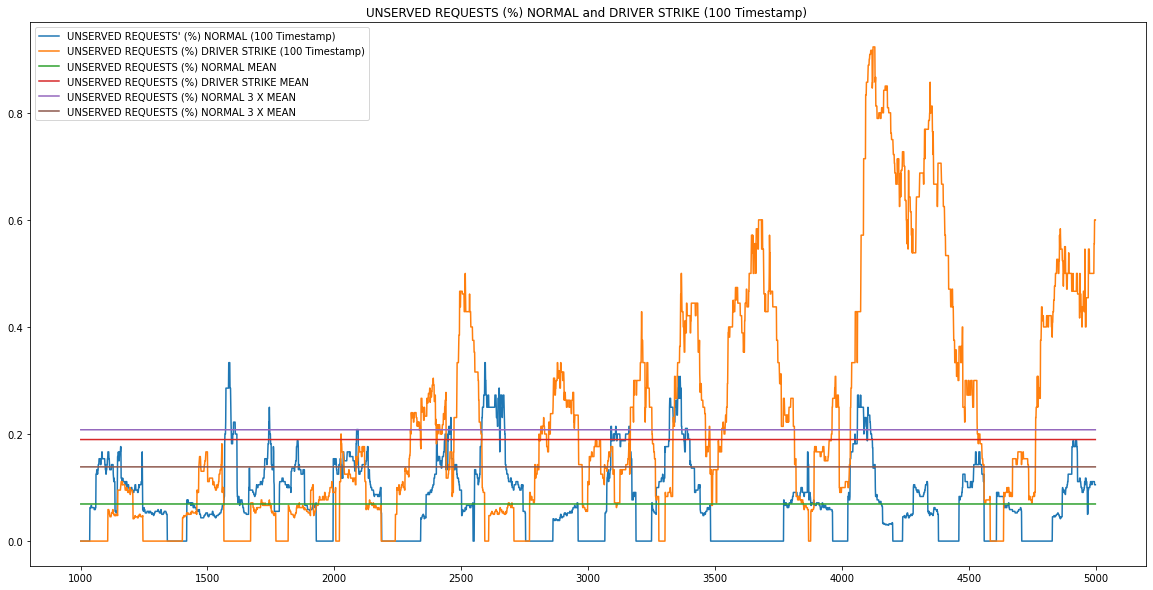

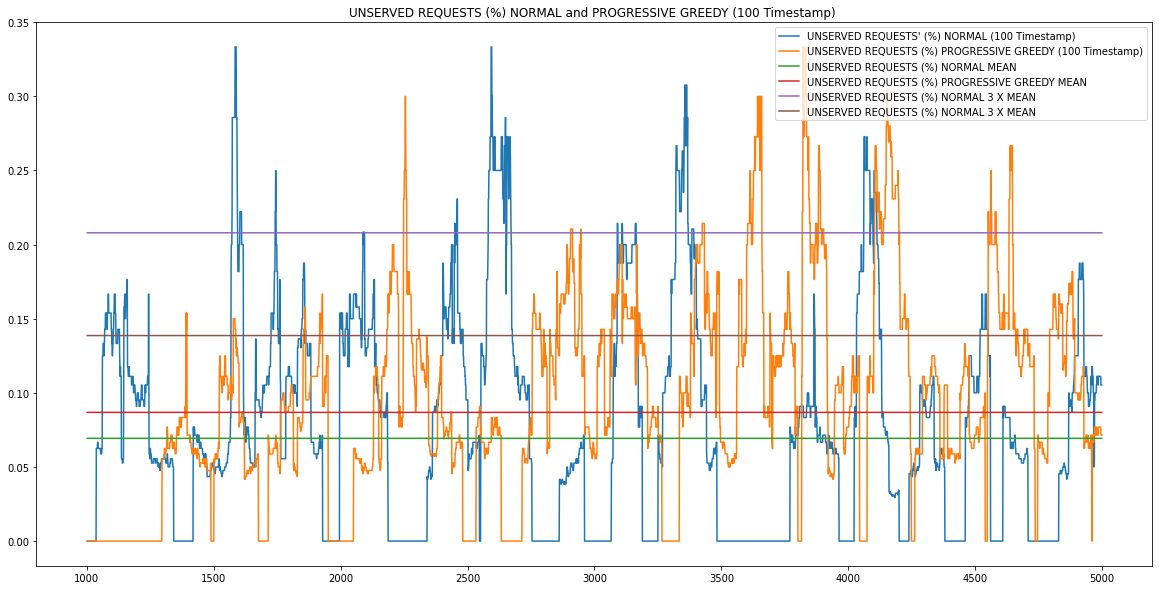

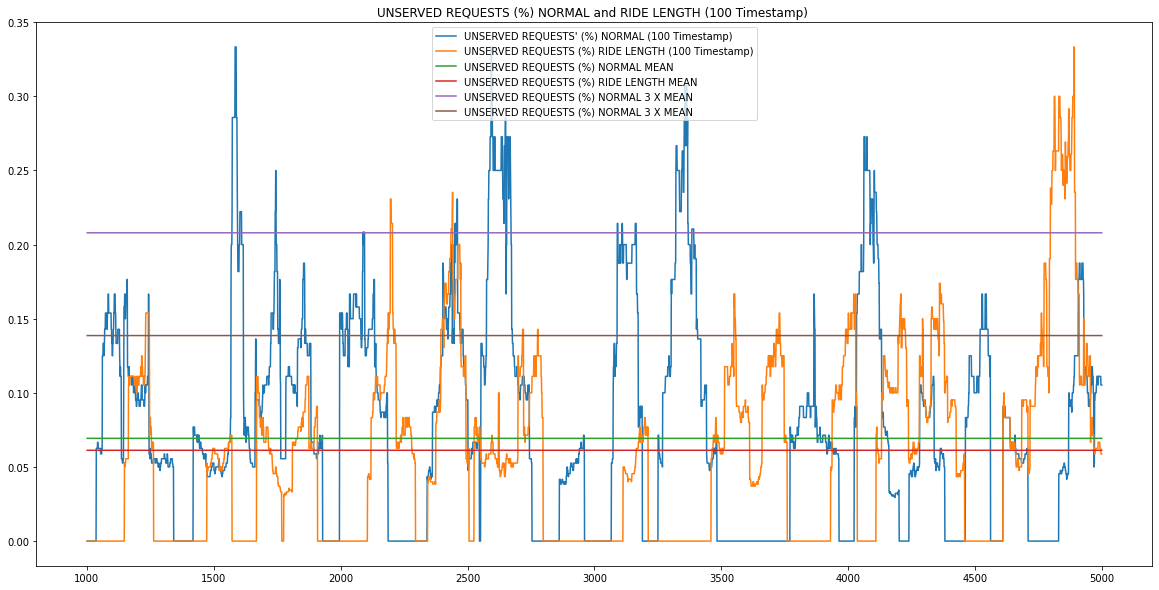

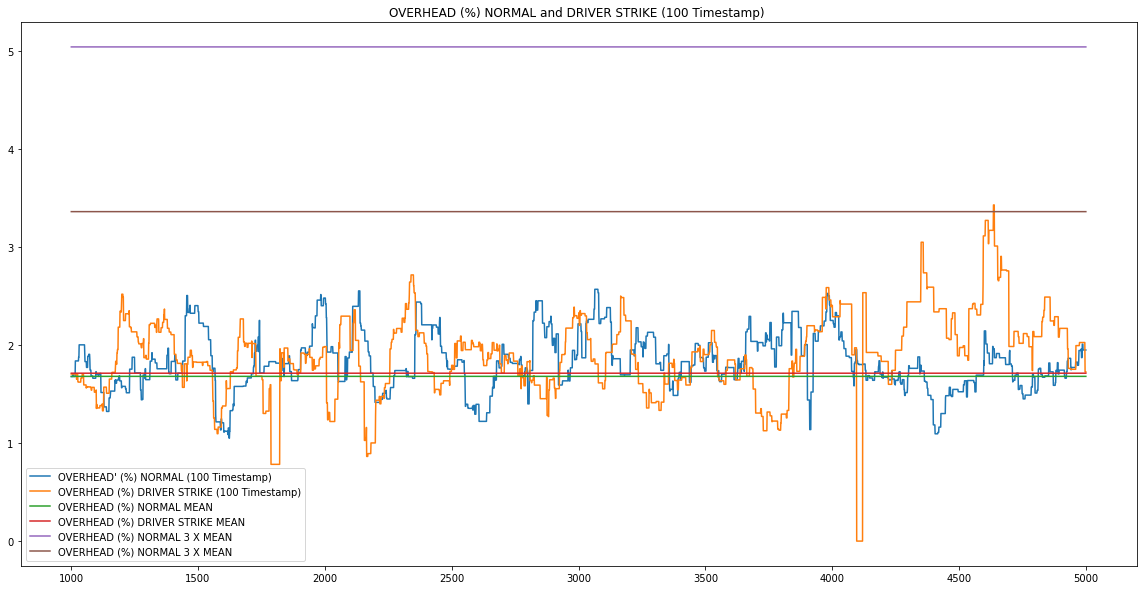

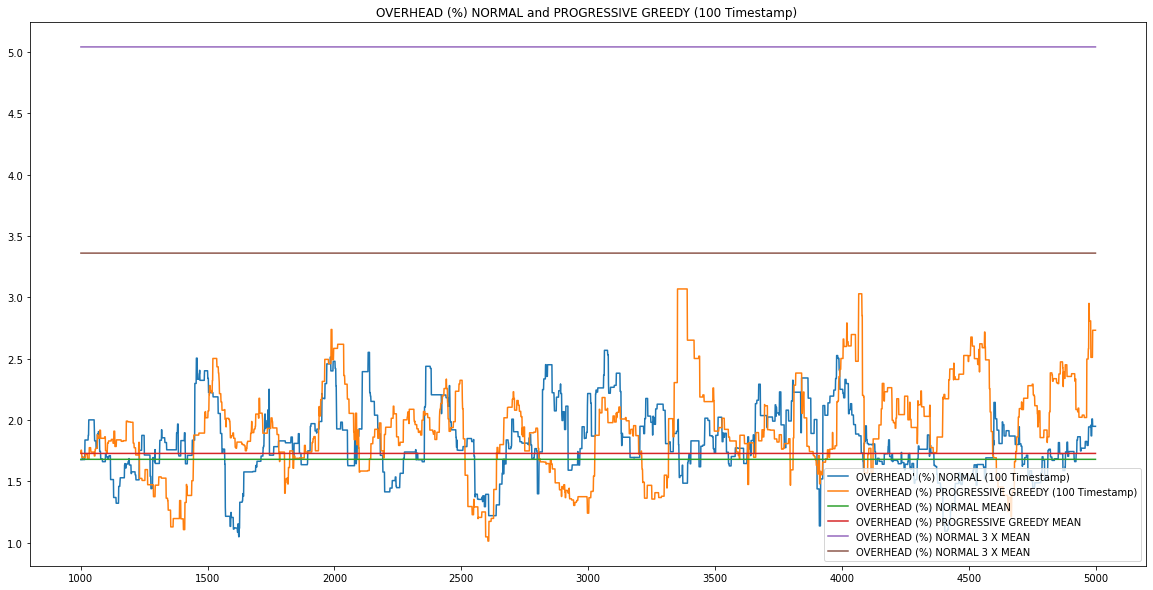

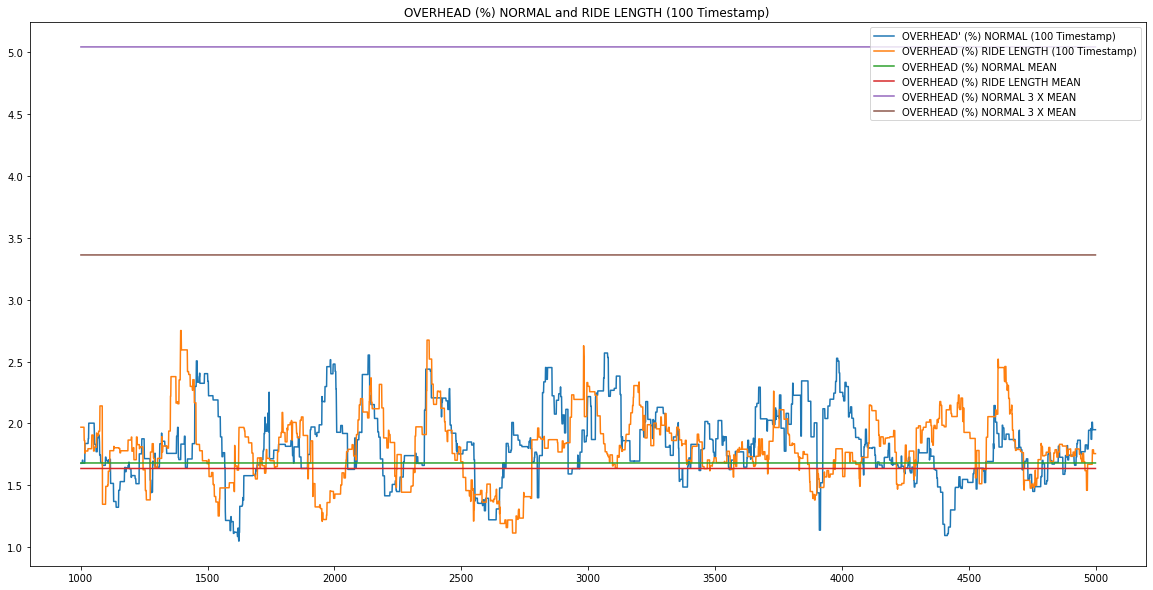

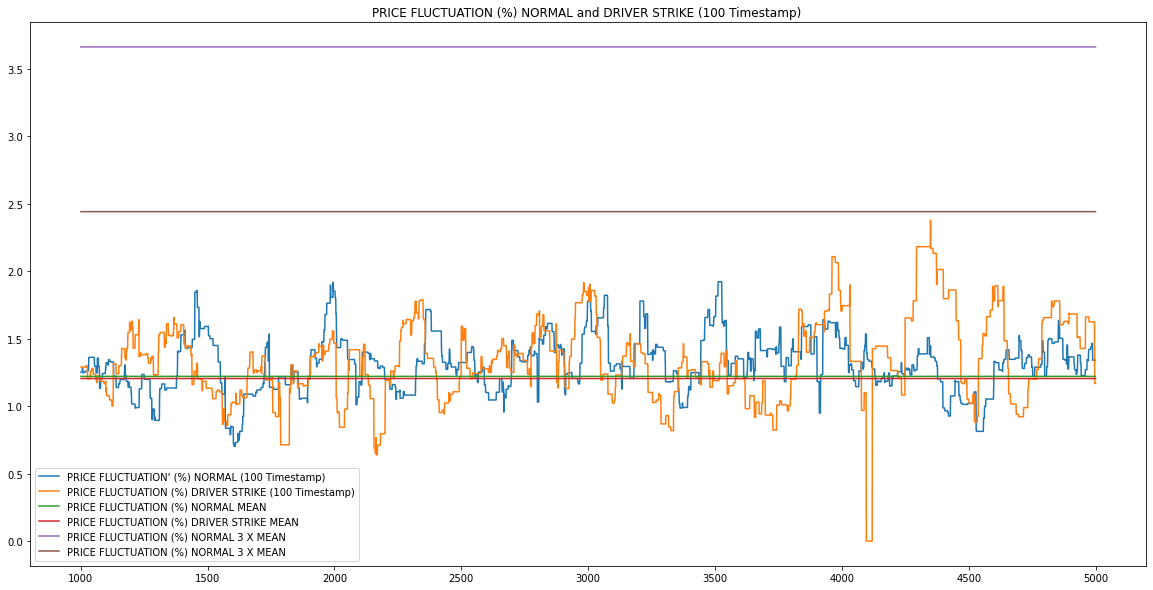

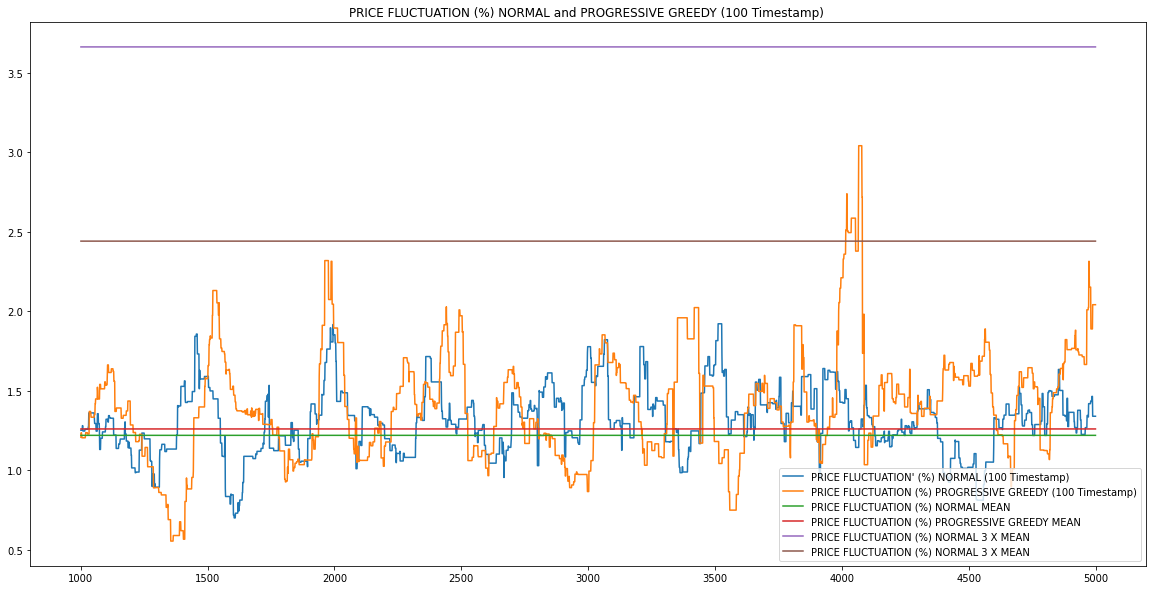

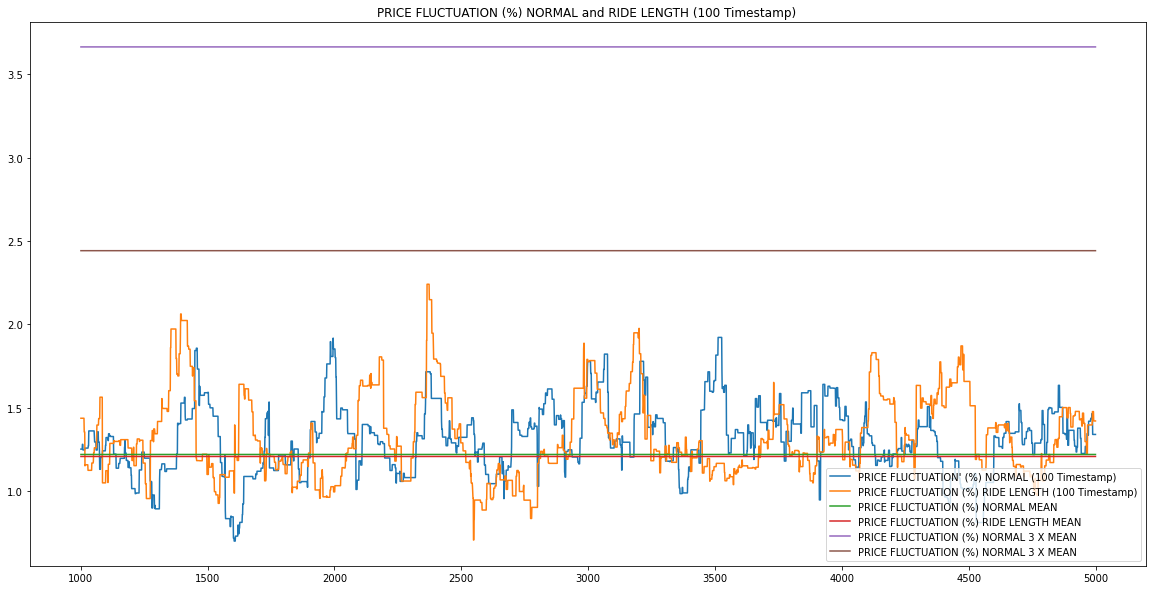

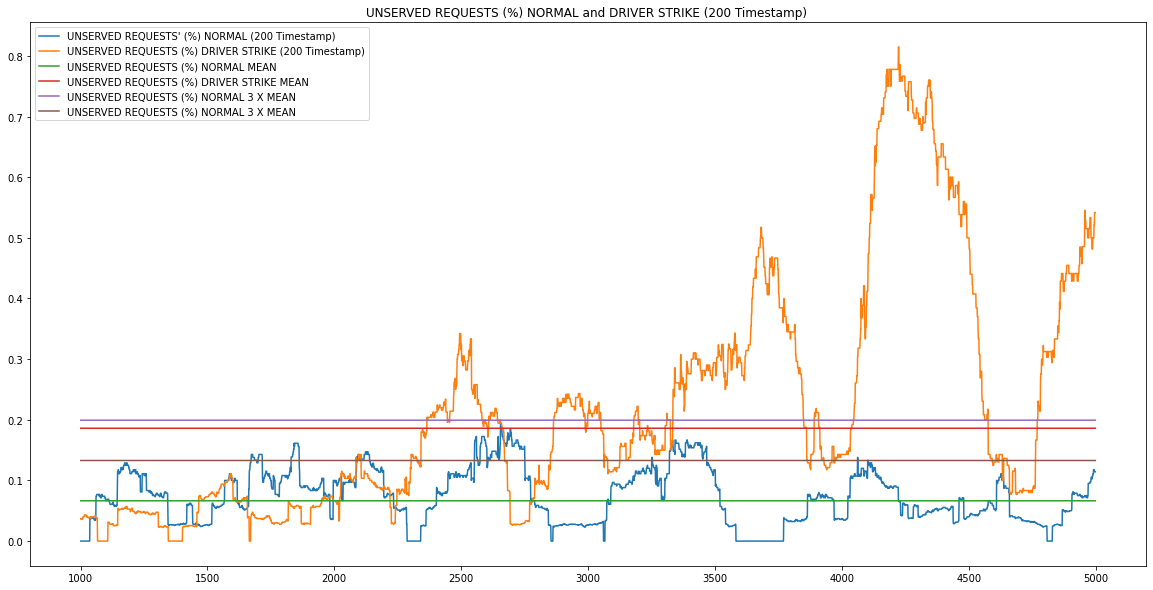

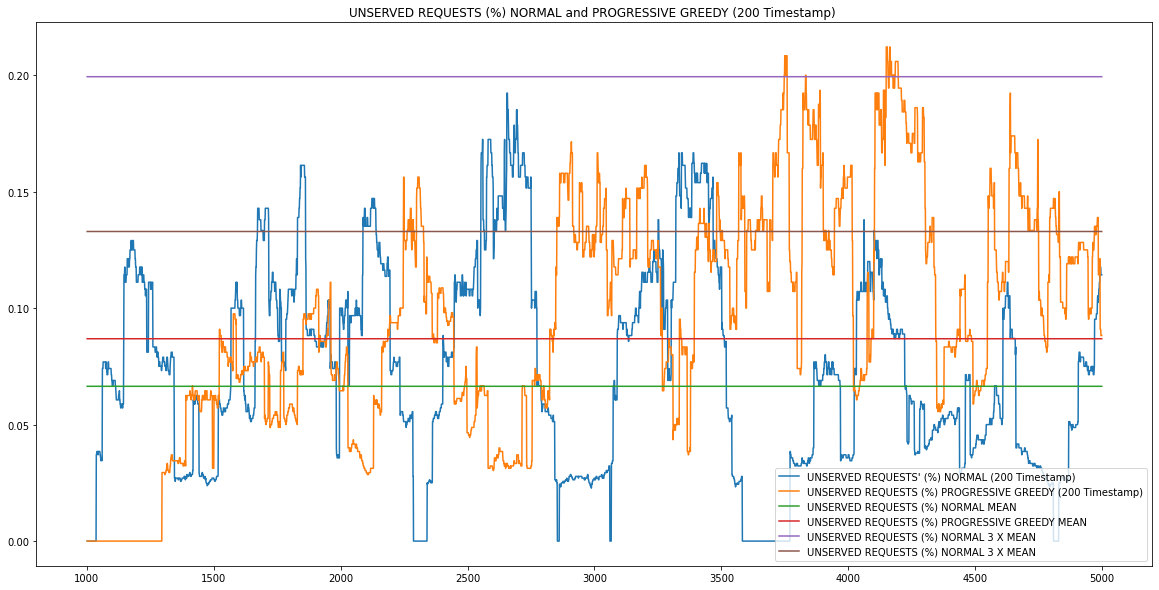

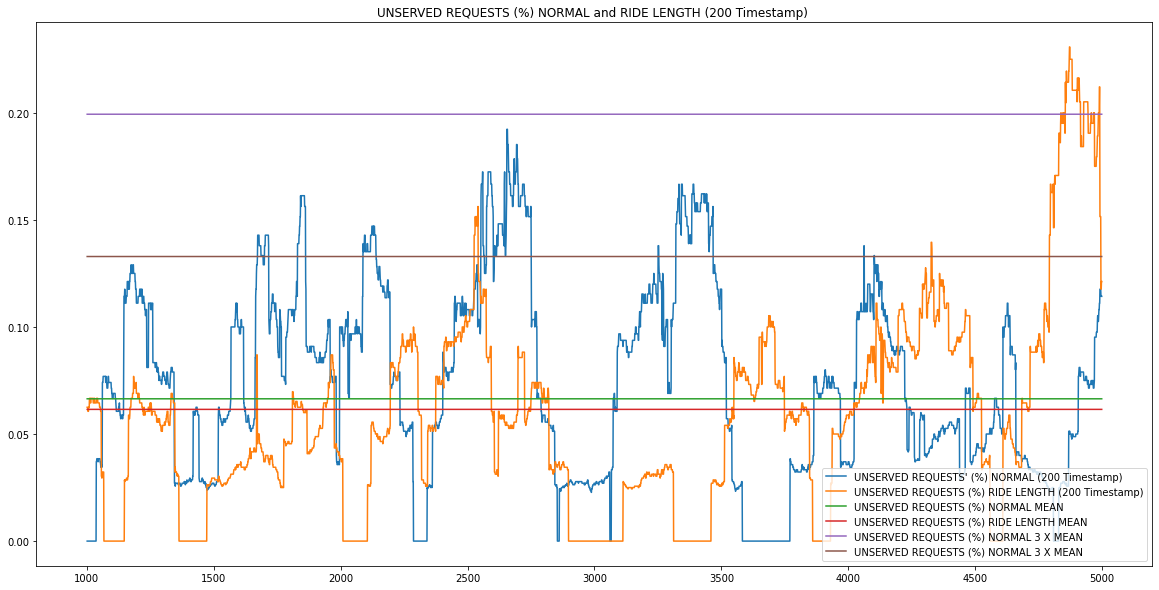

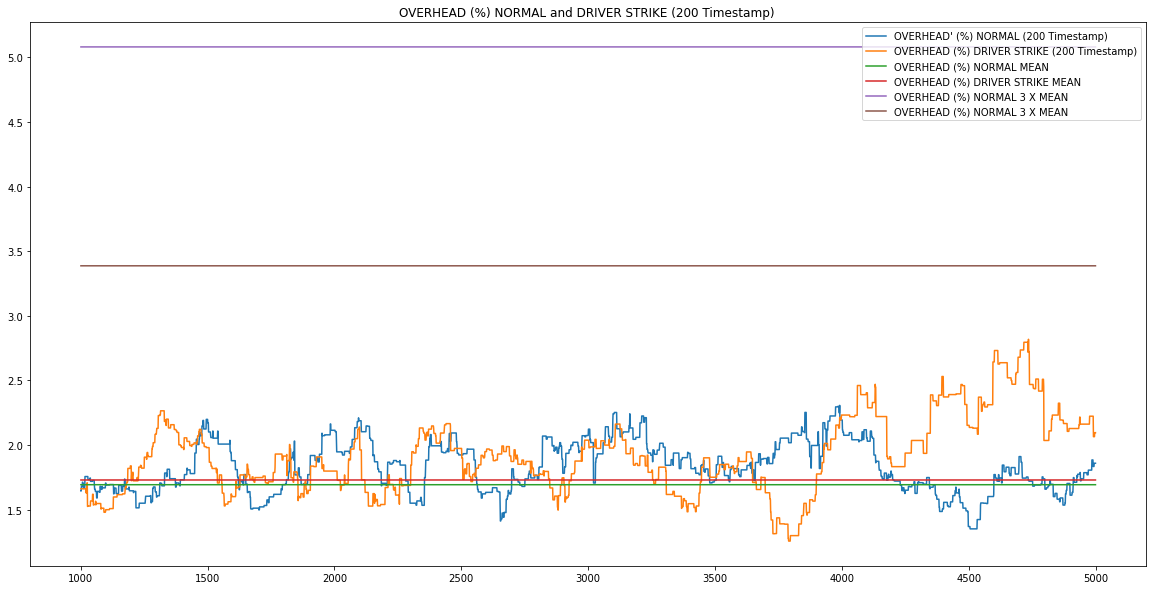

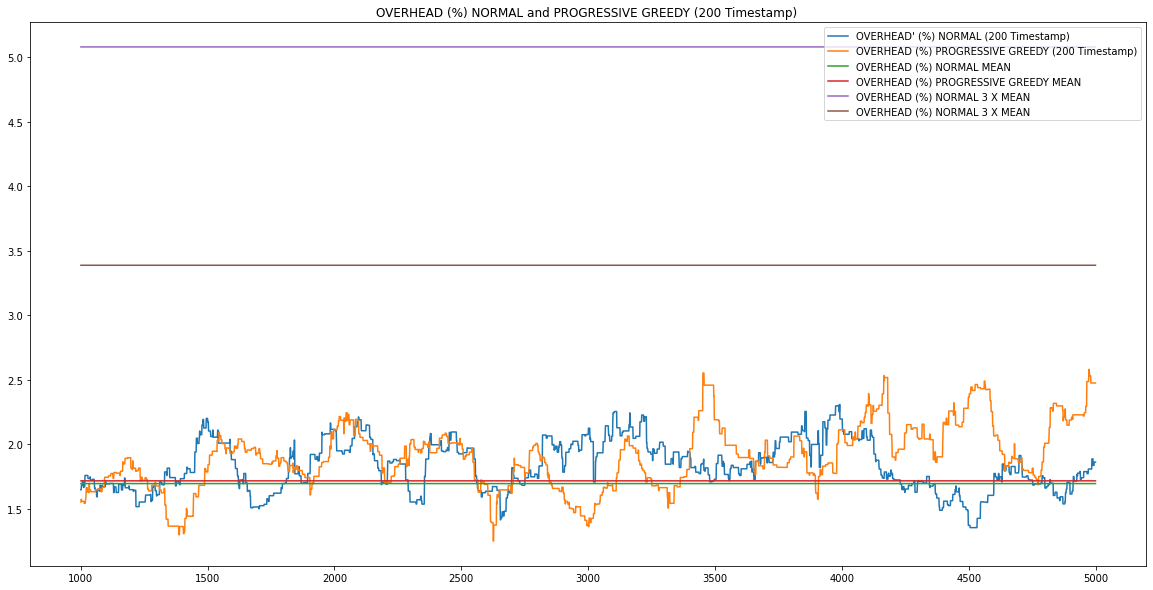

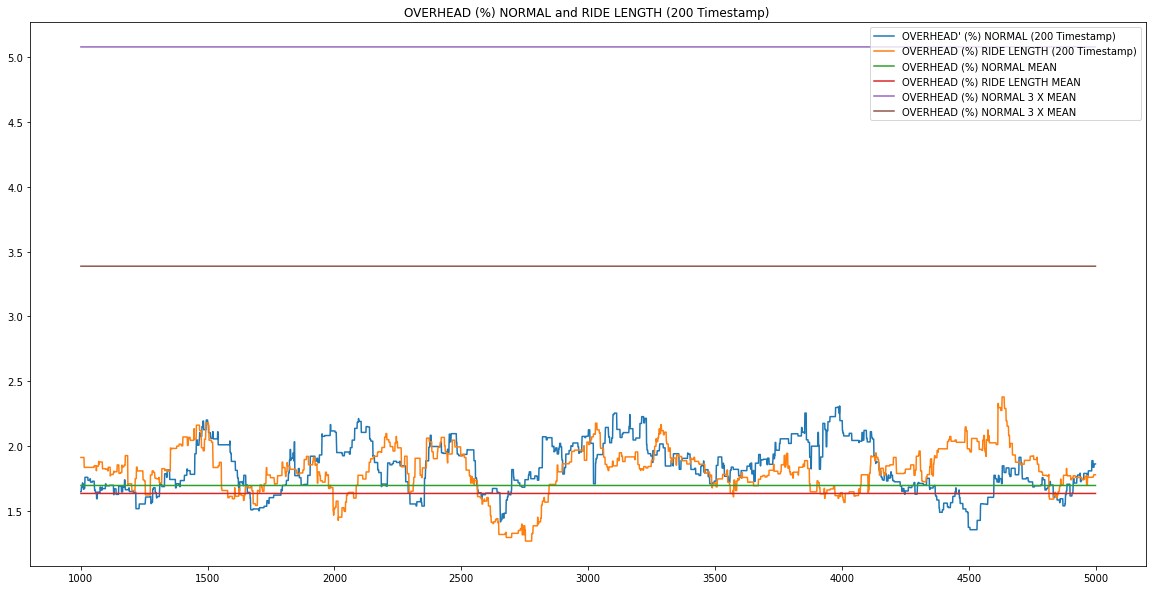

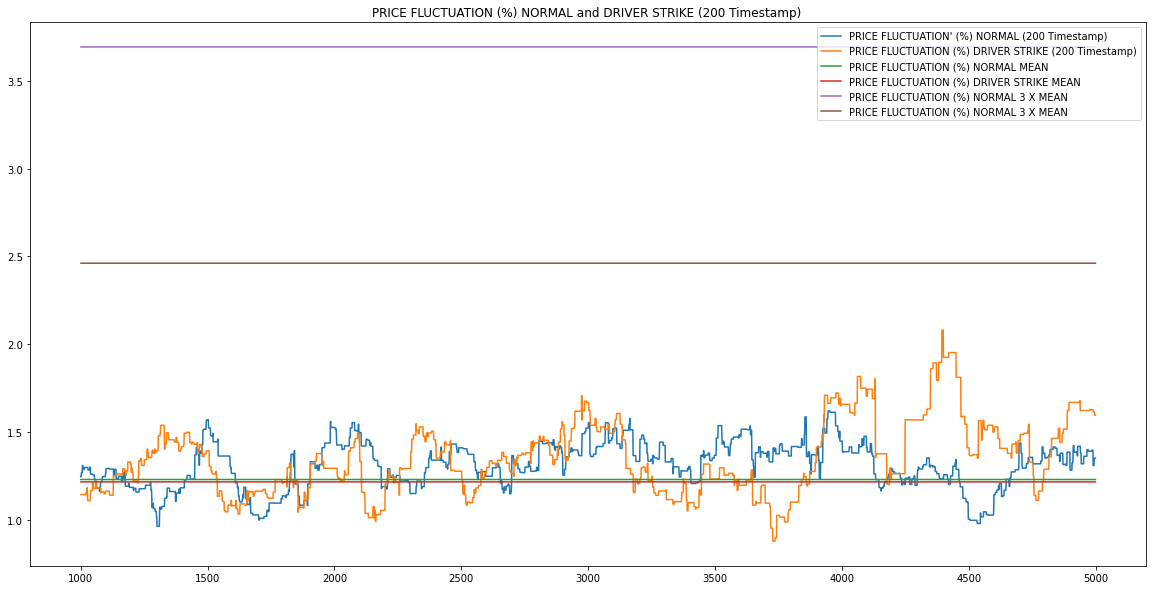

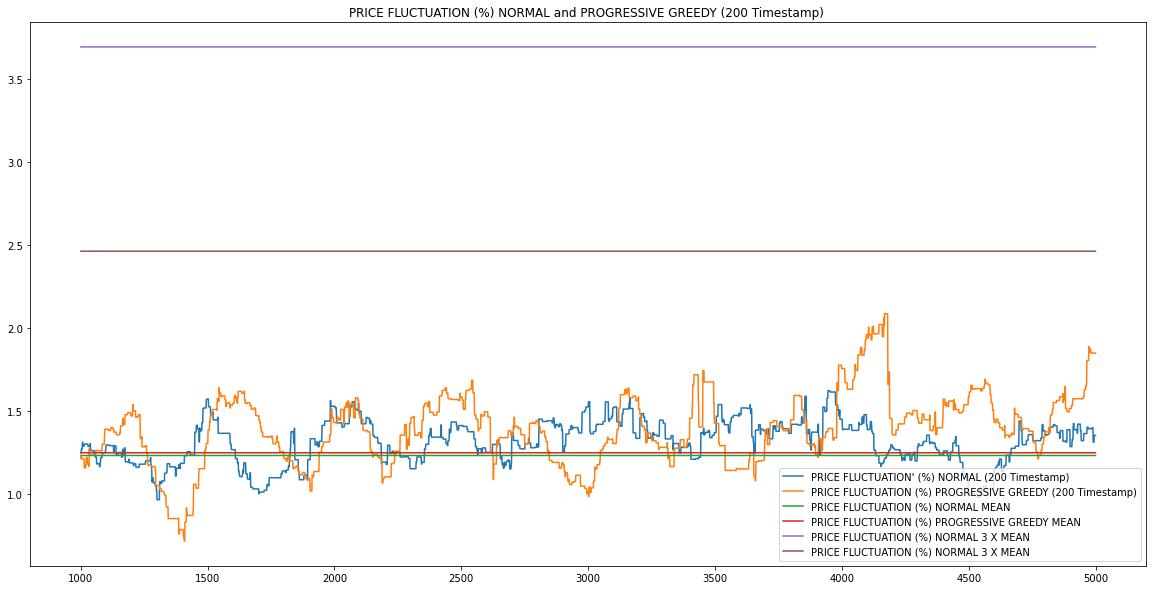

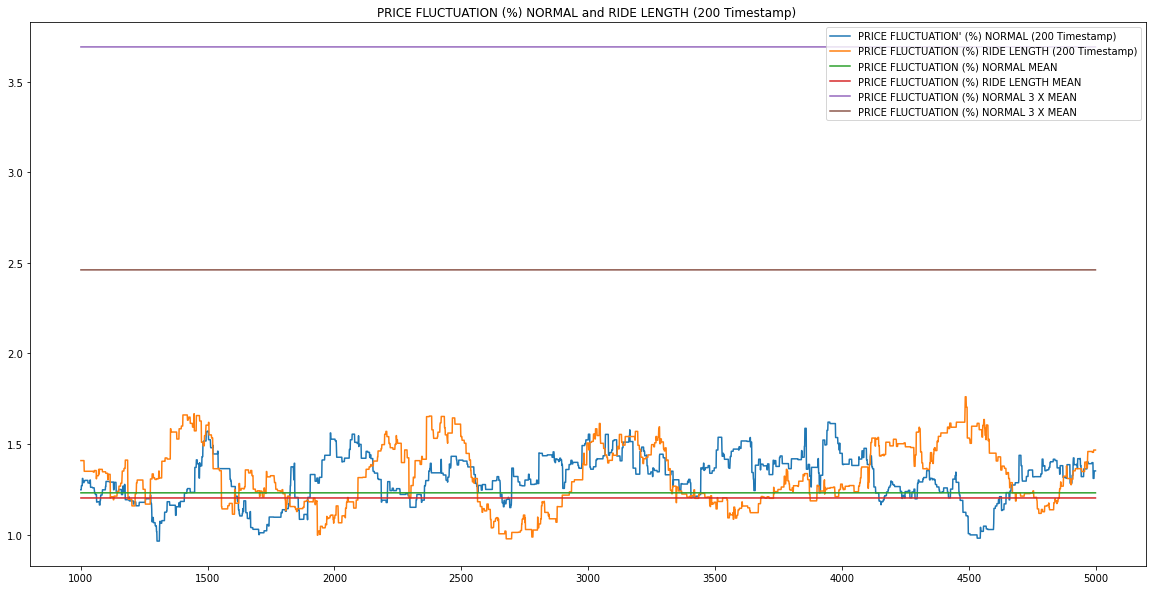

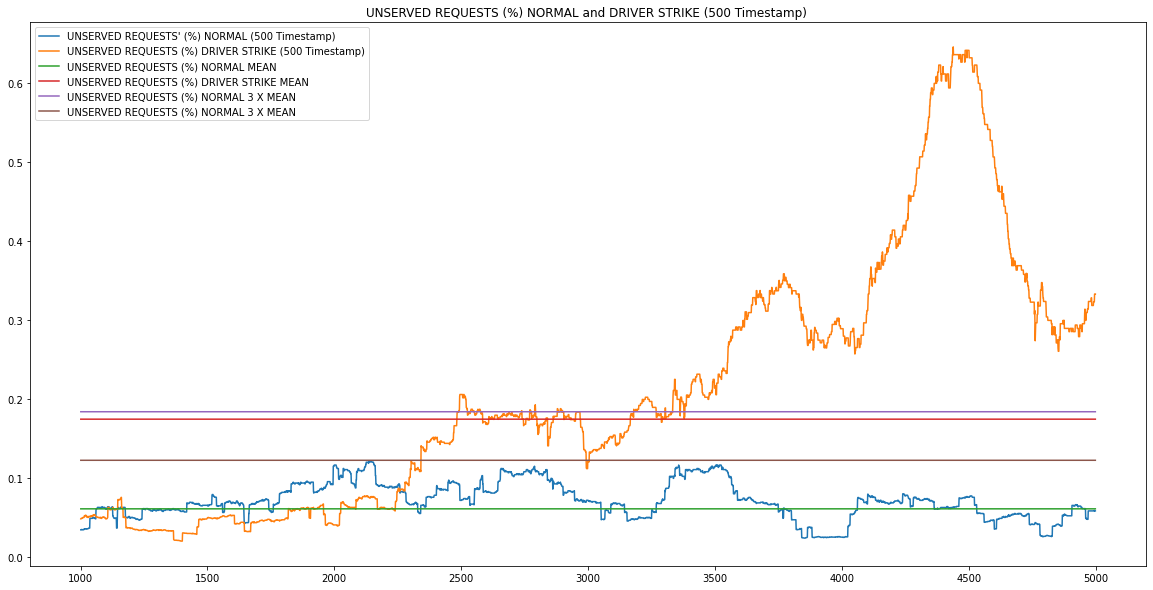

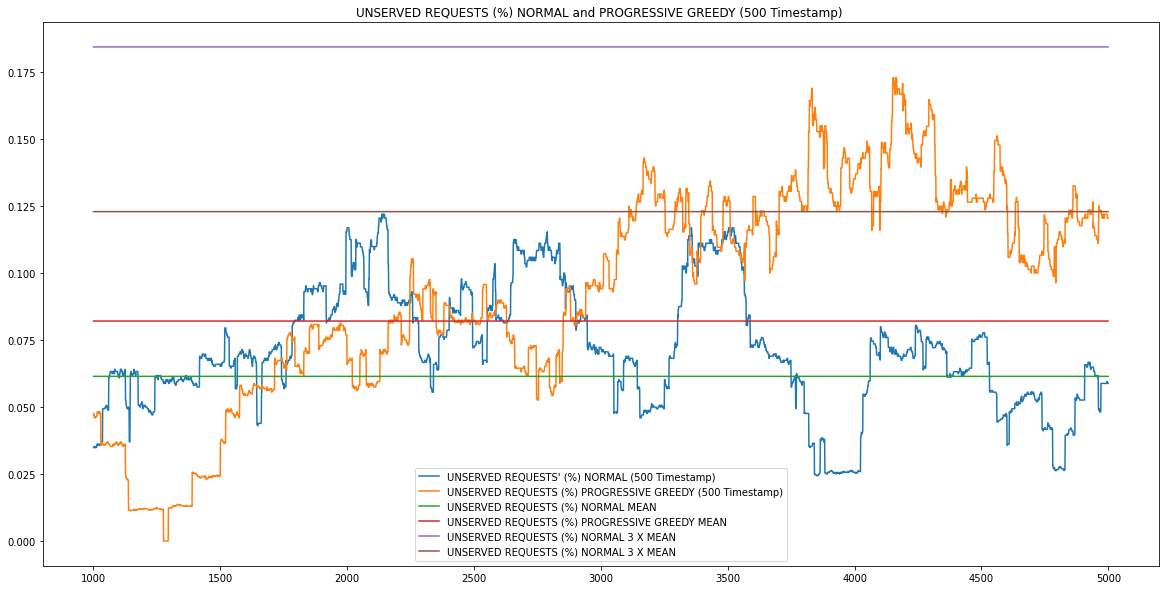

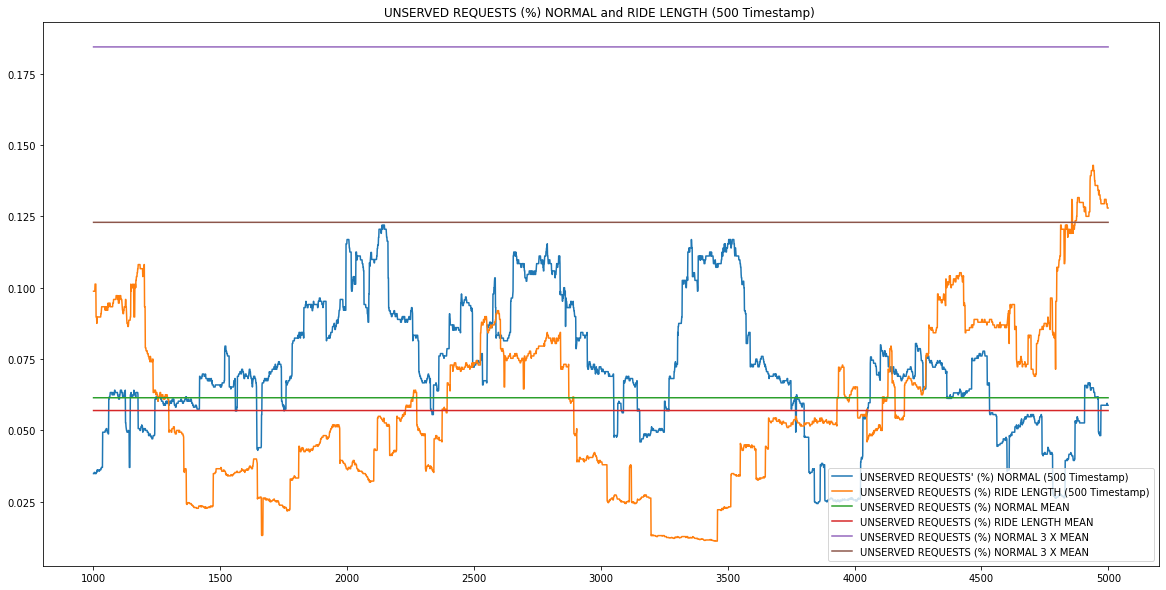

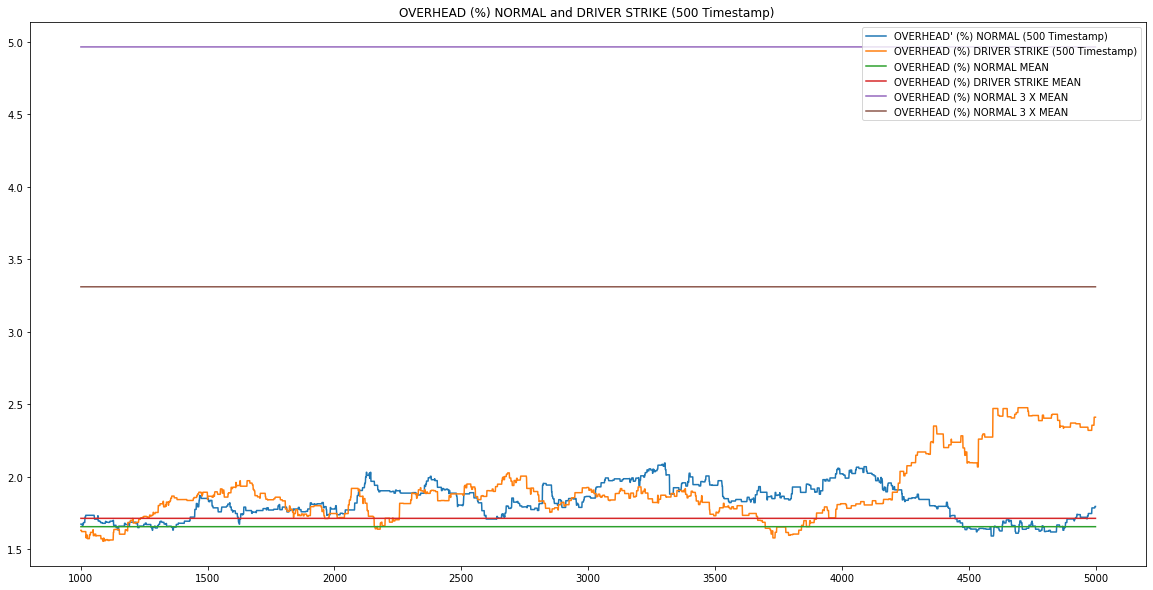

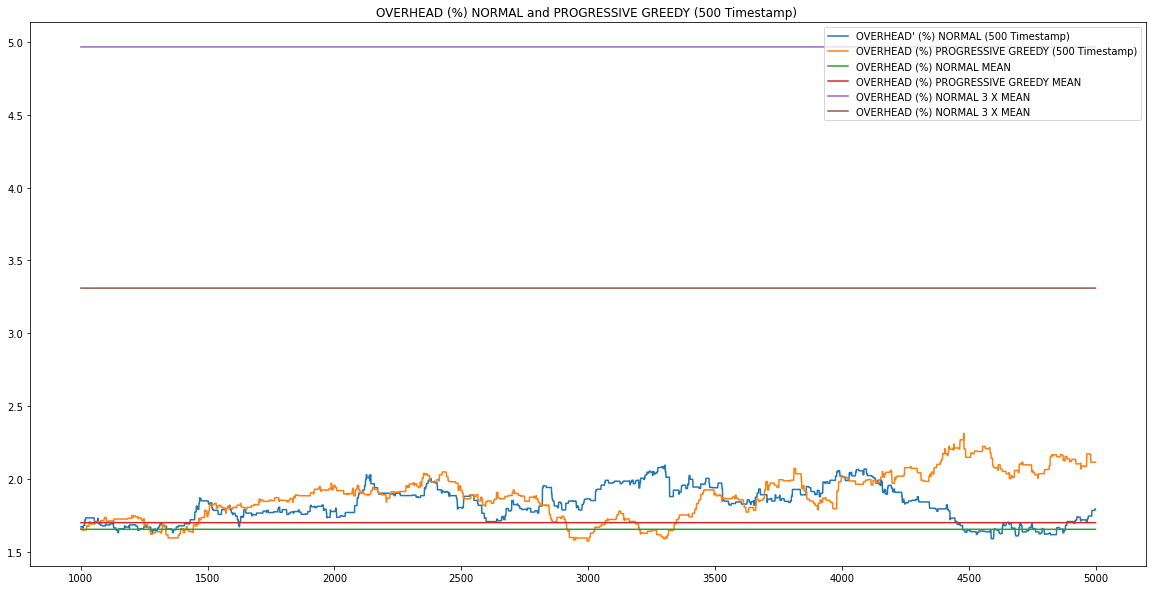

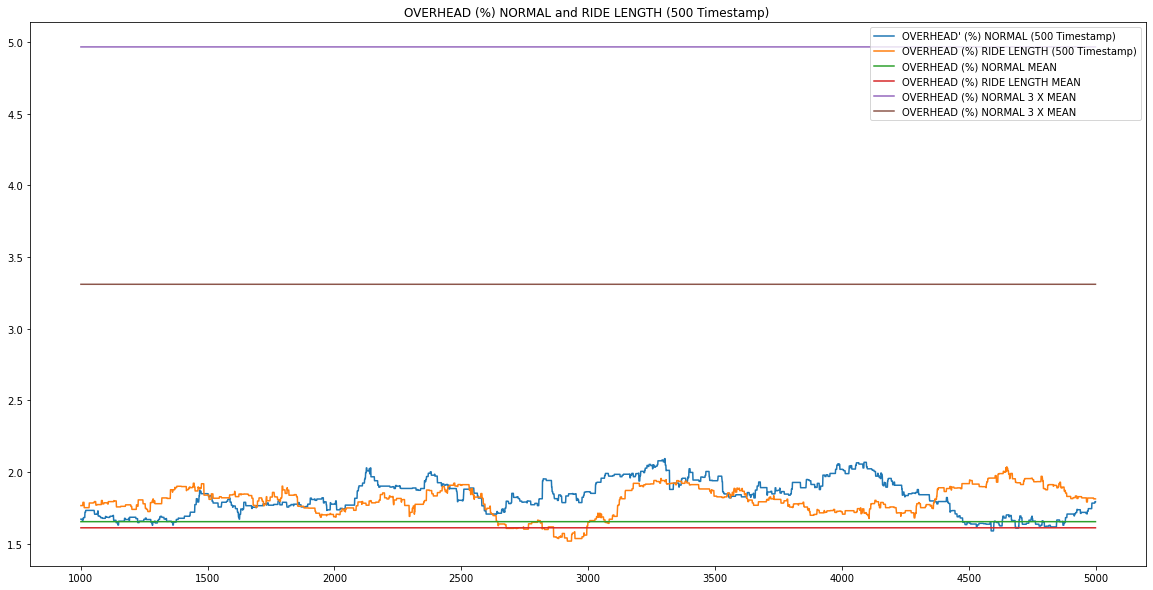

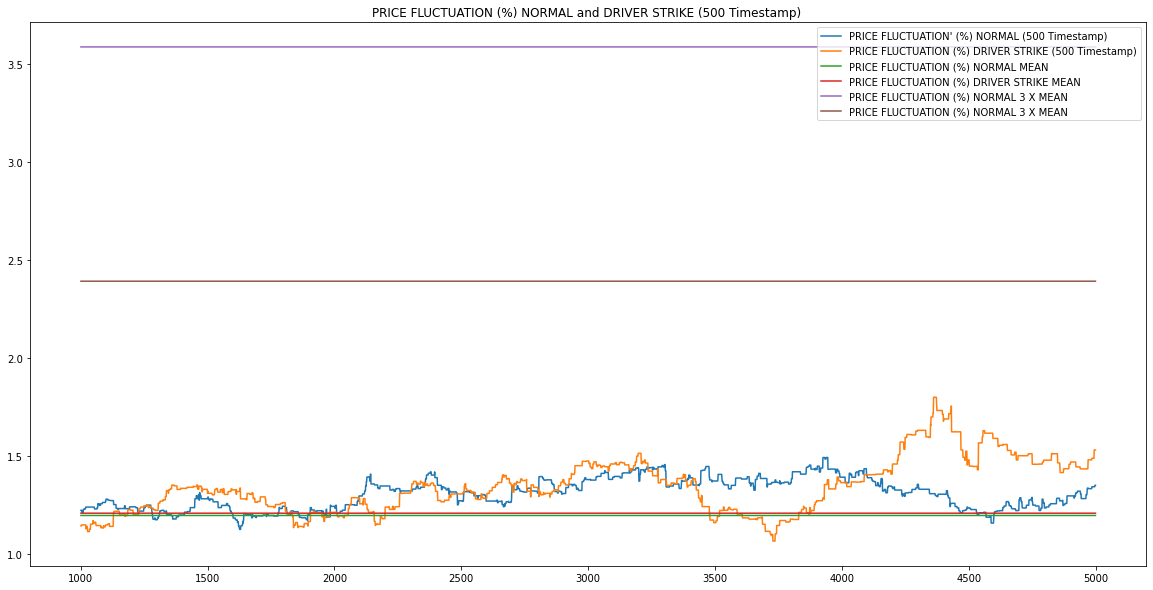

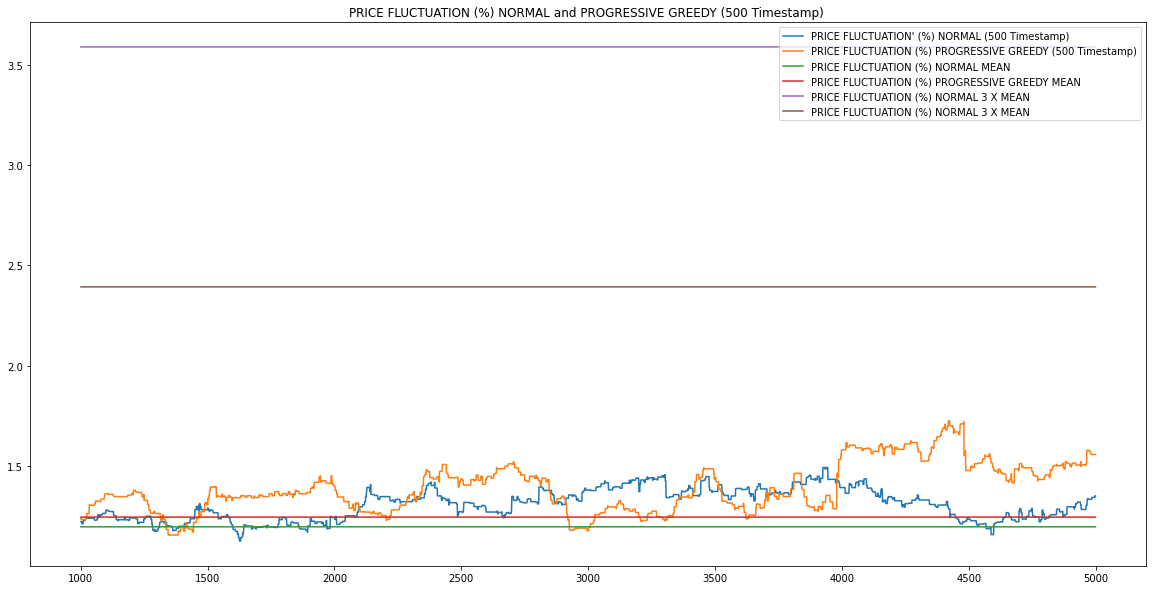

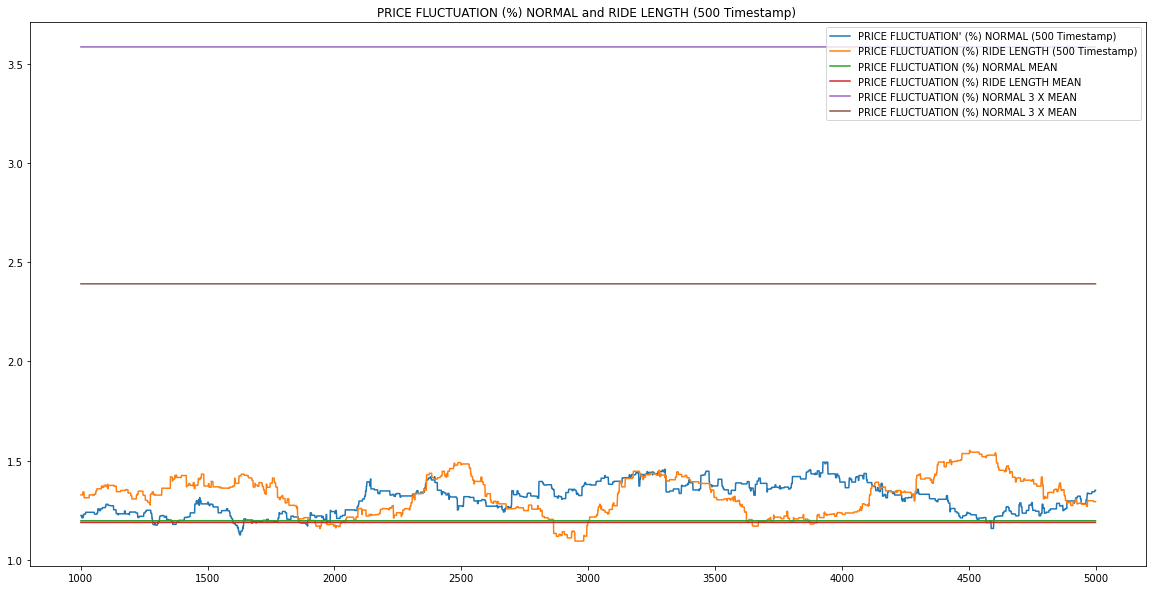

In [111]:
for window in windows:
    for idx in idxs:
        for file_name in files:
            if not file_name == "normal":
                x=list(df_normal['timestamp'])[1000:]
                y_normal=list(df_normal[f'{idx}_{window}'])[1000:]
                normal_mean = df_normal[f'{idx}_{window}'].mean()
                y_normal_mean = [normal_mean for i in range(len(y_normal))]
                y_normal_3_mean = [3*normal_mean for i in range(len(y_normal))]
                y_normal_2_mean = [2*normal_mean for i in range(len(y_normal))]
                y_scenario= []
                if file_name == "driver_strike":
                    y_scenario = list(df_drivers_strike[f'{idx}_{window}'])[1000:]
                    scenario_mean = df_drivers_strike[f'{idx}_{window}'].mean()
                    y_scenario_mean = [scenario_mean for i in range(len(y_scenario))]
                elif file_name == "progressive_greedy":
                    y_scenario = list(df_progressive_greedy[f'{idx}_{window}'])[1000:]
                    scenario_mean = df_progressive_greedy[f'{idx}_{window}'].mean()
                    y_scenario_mean = [scenario_mean for i in range(len(y_scenario))]
                elif file_name == "ride_length":
                    y_scenario = list(df_ride_length[f'{idx}_{window}'])[1000:]
                    scenario_mean = df_ride_length[f'{idx}_{window}'].mean()
                    y_scenario_mean = [scenario_mean for i in range(len(y_scenario))]

                plt.figure(figsize=(20,10))
                plt.plot(x, y_normal, label = f"{idx.upper().replace('_',' ')}' (%) NORMAL ({window} Timestamp)")
                plt.plot(x, y_scenario, label = f"{idx.upper().replace('_',' ')} (%) {file_name.upper().replace('_',' ')} ({window} Timestamp)")
                plt.plot(x, y_normal_mean, label = f"{idx.upper().replace('_',' ')} (%) NORMAL MEAN")
                plt.plot(x, y_scenario_mean, label = f"{idx.upper().replace('_',' ')} (%) {file_name.upper().replace('_',' ')} MEAN")
                plt.plot(x, y_normal_3_mean, label = f"{idx.upper().replace('_',' ')} (%) NORMAL 3 X MEAN")
                plt.plot(x, y_normal_2_mean, label = f"{idx.upper().replace('_',' ')} (%) NORMAL 3 X MEAN")
                plt.title(f"{idx.upper().replace('_',' ')} (%) NORMAL and {file_name.upper().replace('_',' ')} ({window} Timestamp) ")
                plt.legend()
                plt.savefig(directory+f'/indexes_charts/{file_name}_{idx}_{window}.png')
                plt.show()